<h1>Covarance and Correlation</h1>

The two terms are often used interchangeably. Though similar, they are not the same. From Deepak Gupta's definition: Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.

Covarance Matrix <br>
example: vector x, y <br>
Covarance Matrix of these 2 vectors = 
$ \begin{bmatrix}
var(x) & cov(x,y)\\
cov(y,x) & var(y)
\end{bmatrix} $ <br>
where <br>
$ var(x) = \sigma^2 = \frac{\Sigma(x-\bar{x})^2}{n-1}  $ , 
$ cov(x,y) = \frac{\Sigma(x_i-\bar{x})(y_i-\bar{y})}{n-1}  $ <br>
Correlation Matrix <br>
using same vector x, y <br>
Correlation Matrix of these 2 vectors = 
$ \begin{bmatrix}
1 & cor(x,y)\\
cor(y,x) & 1
\end{bmatrix} $ <br> where <br> 
$ cor(x,y) = \frac{cov(x,y)}{\sigma_{x} * \sigma_{y}}  $


In [36]:
#covarance matrix
import numpy as np
my_covarnace_matrix = np.matrix([[6, 2, 4], [6, 4, 8]])
print("var(x) = ",np.var(my_covarnace_matrix[0], ddof=1)) # var(X)
print("var(y) = ",np.var(my_covarnace_matrix[1], ddof=1)) # var(Y)
x_x_mean = my_covarnace_matrix[0] - my_covarnace_matrix[0].mean()
y_y_mean = my_covarnace_matrix[1] - my_covarnace_matrix[1].mean()
print("x-\u03BC = ", x_x_mean,"; y-\u03BC = ", y_y_mean)
n = my_covarnace_matrix[0].shape[1] # x and y are 3 element array, n=3
print(x_x_mean * y_y_mean.T /(n-1)) # cov(x,y)
print(y_y_mean * x_x_mean.T /(n-1)) # cov(y,x)
print("Therefore X, Y covarnace matrix = ")
print(np.cov(my_covarnace_matrix))


var(x) =  4.0
var(y) =  4.0
x-μ =  [[ 2. -2.  0.]] ; y-μ =  [[ 0. -2.  2.]]
[[2.]]
[[2.]]
Therefore X, Y covarnace matrix = 
[[4. 2.]
 [2. 4.]]


In [37]:
#covarance matrix
np.corrcoef(my_covarnace_matrix)

array([[1. , 0.5],
       [0.5, 1. ]])

Above is Pearson correlation coefficient. For Pandas implementation

In [46]:
import pandas as pd
x = pd.Series([6, 2, 4])
y = pd.Series([6, 4, 8])
print(x.corr(y))
print(y.corr(x))
# x.corr(y, method='spearman')  # Spearman's rho requires scipy
# x.corr(y, method='kendall')   # Kendall's tau, requires scipy

0.5
0.5


Noneparametric correlation analysis
for correlation between categorical, nonlinear, non-nornally distrubted variables

Spearman's Rank correlation
find R correlation between variable-pairs of ordinal data type
same as Pearson, R=-1, 0, 1

Chi-Square test for independence
p < 0.05 (5%) : reject null hypothesis and conclude that the variables are correlated
p > 0.05 (5%) : accept null hypothesis and conclude that the variables are independent
Note, Depending on the cost of making mistakes, the researcher may apply more stringent criteria for declaring significance, such as .01 or .005.
Is the p_value = Chi-square test?

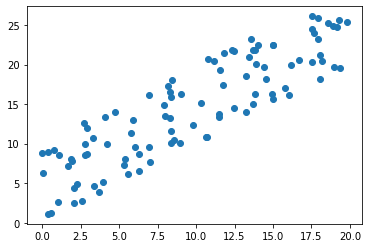

In [2]:
#Referencing from 
#https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
from numpy.random import rand, seed
from matplotlib import pyplot
# generate random data with seed
seed(1)
# data1 is uniform distributed, data2 is data1 + uniform distribution between 0 and 10
data1 = rand(100) * 20
data2 = data1 + (rand(100) * 10)
# plot
pyplot.scatter(data1, data2)
pyplot.show()

Above plot shows a clear correlation between these 2 datasets by the diagonal groupings of the points

In [3]:
from scipy.stats import spearmanr
spearmanr_coeffient, p_value = spearmanr(data1, data2)
print("Spearmans correlation coefficient is ", spearmanr_coeffient)
print("The likelihood of observing the data given that the samples are uncorrelated is ", p_value)

Spearmans correlation coefficient is  0.8754755475547553
The likelihood of observing the data given that the samples are uncorrelated is  1.0270647413555022e-32


we can reject the null hypothesis that the samples are uncorrelated base on the p_values (normally set at 5%,). p_value is not chi2 test though. 

Below is another example using seaborn sample data to compare the diamond price affected by cut and color

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use("seaborn-whitegrid")

In [6]:
diamond = sn.load_dataset('diamonds')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
# row is index, column is columns, default agg function is the number of observations in each combination
pd.crosstab( index=diamond['cut'], columns=diamond['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [8]:
meanprice = pd.crosstab(index=diamond['cut'], columns=diamond['color'], values=diamond['price'], aggfunc=np.mean)
#average price of the diamond, cut in certain way and in certain color
meanprice

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


Text(0.5, 1.0, 'Mean price of diamonds')

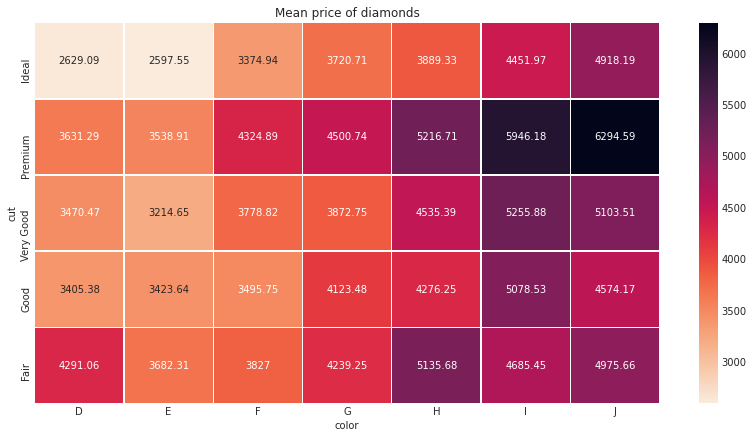

In [9]:
sn.heatmap(meanprice, cmap='rocket_r', annot=True, fmt='g', linewidths=.3) # fmt = 'g' displays numbers as int instead of scientific notation
plt.title("Mean price of diamonds")

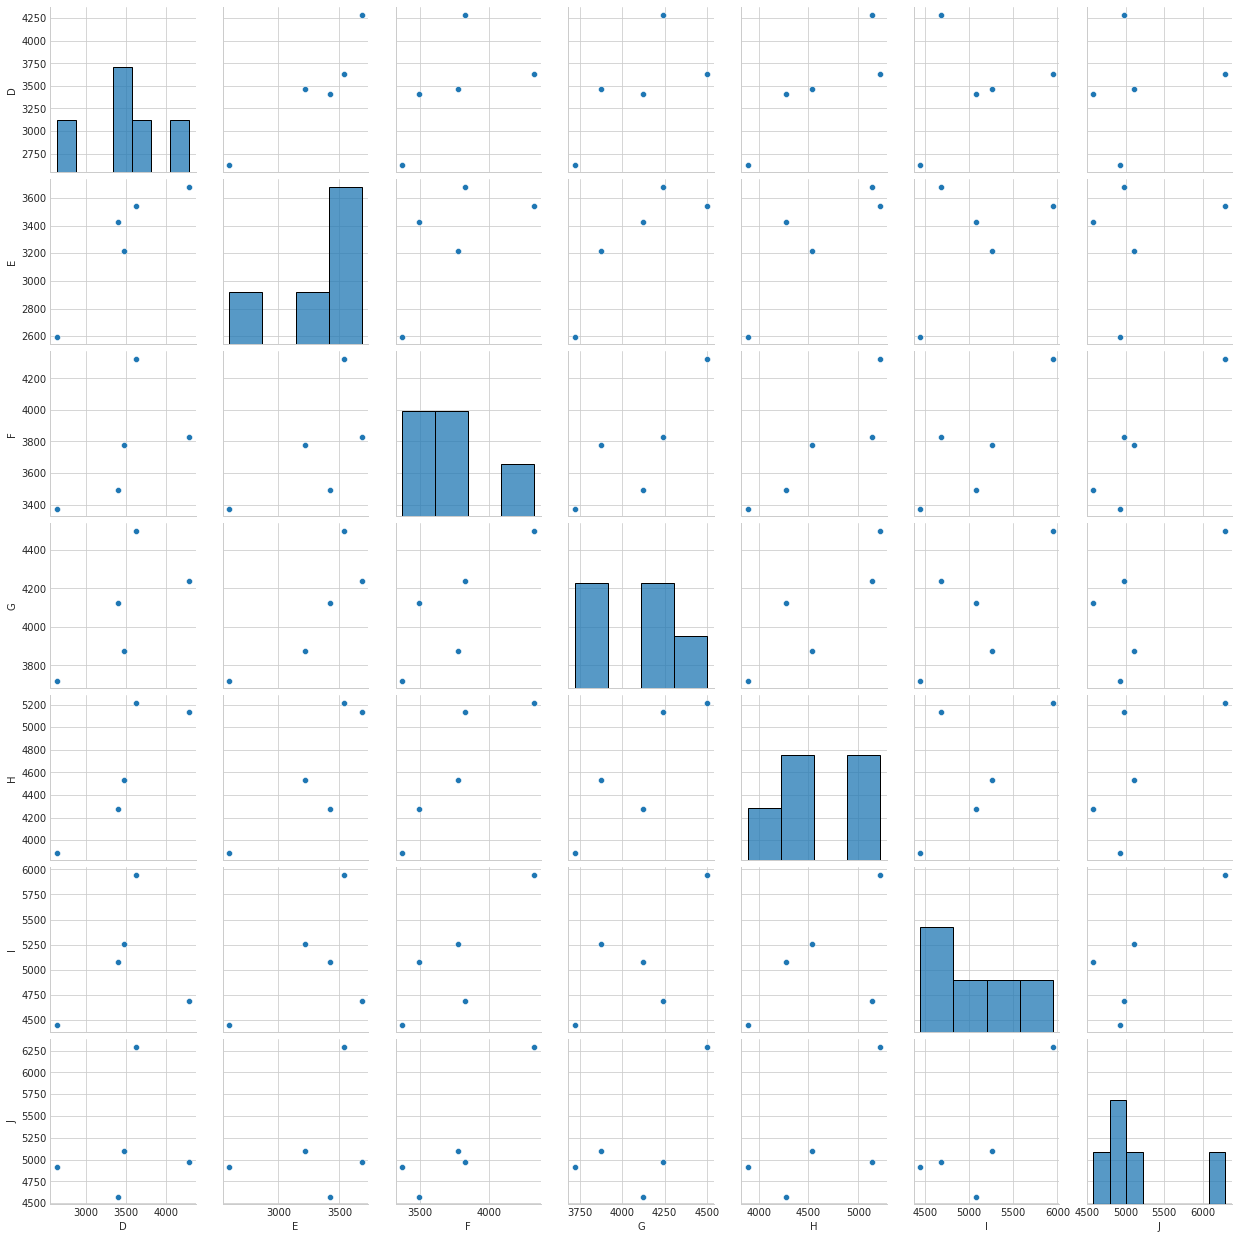

In [10]:
sn.pairplot(meanprice)

none of above seems linear or normally distributed. therefore it's valid to use spearman R

In [11]:
# Spearman's Rank correlation
spearmanr_coeffient, p_value = spearmanr(meanprice['D'], meanprice['E'])
print("Spearman nonlinear correlation coefficient between D and E ", spearmanr_coeffient)
print("Probability of such such correlation is by chance is ", p_value)
spearmanr_coeffient, p_value = spearmanr(meanprice['E'], meanprice['I'])
print("Spearman nonlinear correlation coefficient between E and I ", spearmanr_coeffient)
print("Probability of such such correlation is by chance is ", p_value)

Spearman nonlinear correlation coefficient between D and E  0.8999999999999998
Probability of such such correlation is by chance is  0.03738607346849874
Spearman nonlinear correlation coefficient between E and I  0.3
Probability of such such correlation is by chance is  0.6238376647810728
